### Student Information
Name: LI Yuen-ting (Charlotte)

Student ID: 112zm1031 (NCCU)

GitHub ID: Charliongithub

---

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [2]:
### Begin Assignment Here
# Lab1-Master 
# https://github.com/Charliongithub/DM2024-Lab1-Master/blob/main/DM2024-Lab1-Master.ipynb

In [3]:
###Load the dataset###
!pip install datasets

from datasets import load_dataset

ds = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 6.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0


README.md:   0%|          | 0.00/978 [00:00<?, ?B/s]

(…)nt_Analysis_of_YouTube_Comments_Data.csv:   0%|          | 0.00/219k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1500 [00:00<?, ? examples/s]

In [50]:
###Set up###
import sys
sys.path.append('/Users/charlotteli/Library/Mobile Documents/com~apple~CloudDocs/Documents/NCCU/Data Mining Concepts, Techniques, and Applications/DMLab1/DMLab1HW/DM2024-Lab1-Homework/DM2024-Lab1-Master')

%load_ext autoreload
%autoreload 2
import helpers.data_mining_helpers as dmh

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
###Data Preparation###
import pandas as pd
data = ds['train'].to_pandas()

In [52]:
print(data.columns)
print(data.shape)
print(data.head(2))

Index(['sentiment', 'comment'], dtype='object')
(1500, 2)
       sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...


In [53]:
print(data['sentiment'].unique())
print(data['sentiment'].value_counts())

['not nostalgia' 'nostalgia']
sentiment
not nostalgia    750
nostalgia        750
Name: count, dtype: int64


In [54]:
###Data Transformation###
data['label'] = data['sentiment'].apply(lambda x: 1 if x == 'nostalgia' else 0)

In [56]:
#Adding Columns
data['label'] = data['sentiment'].apply(lambda x: 1 if x == 'nostalgia' else 0)
data['category_name'] = data['sentiment'] 

In [57]:
data[0:10]

,sentiment,comment,label,category_name
0,not nostalgia,He was a singer with a golden voice that I lov...,0,not nostalgia
1,nostalgia,The mist beautiful voice ever I listened to hi...,1,nostalgia
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1,nostalgia
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0,not nostalgia
4,nostalgia,listening to his songs reminds me of my mum wh...,1,nostalgia
5,nostalgia,"Every time I heard this song as a child, I use...",1,nostalgia
6,nostalgia,"My dad loved listening to Jim Reeves, when I w...",1,nostalgia
7,nostalgia,i HAVE ALSO LISTENED TO Jim Reeves since child...,1,nostalgia
8,not nostalgia,Wherever you are you always in my heart,0,not nostalgia
9,not nostalgia,Elvis will always be number one no one can com...,0,not nostalgia


In [58]:
#Familiarizing with the Data
data[:10][['comment', 'category_name']]

,comment,category_name
0,He was a singer with a golden voice that I lov...,not nostalgia
1,The mist beautiful voice ever I listened to hi...,nostalgia
2,I have most of Mr. Reeves songs. Always love ...,nostalgia
3,30 day leave from 1st tour in Viet Nam to conv...,not nostalgia
4,listening to his songs reminds me of my mum wh...,nostalgia
5,"Every time I heard this song as a child, I use...",nostalgia
6,"My dad loved listening to Jim Reeves, when I w...",nostalgia
7,i HAVE ALSO LISTENED TO Jim Reeves since child...,nostalgia
8,Wherever you are you always in my heart,not nostalgia
9,Elvis will always be number one no one can com...,not nostalgia


In [59]:
data[-10:][['comment', 'category_name']]

,comment,category_name
1490,"He really isn't my cup of tea, but some of his...",not nostalgia
1491,real music...how i miss those days...brings ba...,nostalgia
1492,i used to cry over this song cause i had a boy...,nostalgia
1493,"He really has that ""love you like a brother"" l...",not nostalgia
1494,That's funny. But Leo really is a nice guy. He...,not nostalgia
1495,"i don't know!..but the opening of the video,.....",not nostalgia
1496,it's sad this is such a beautiful song when yo...,not nostalgia
1497,"Dear Friend, I think age and time is not that ...",not nostalgia
1498,I was born in 1954 and started to be aware of ...,nostalgia
1499,This is the first CD I bought after my marriag...,nostalgia


In [60]:
data.loc[:10, 'comment']

0     He was a singer with a golden voice that I lov...
1     The mist beautiful voice ever I listened to hi...
2     I have most of Mr. Reeves songs.  Always love ...
3     30 day leave from 1st tour in Viet Nam to conv...
4     listening to his songs reminds me of my mum wh...
5     Every time I heard this song as a child, I use...
6     My dad loved listening to Jim Reeves, when I w...
7     i HAVE ALSO LISTENED TO Jim Reeves since child...
8              Wherever you  are you always in my heart
9     Elvis will always be number one no one can com...
10    ill bet if they begin to play this song on the...
Name: comment, dtype: object

In [61]:
data.iloc[:10, data.columns.get_loc('comment')]

0    He was a singer with a golden voice that I lov...
1    The mist beautiful voice ever I listened to hi...
2    I have most of Mr. Reeves songs.  Always love ...
3    30 day leave from 1st tour in Viet Nam to conv...
4    listening to his songs reminds me of my mum wh...
5    Every time I heard this song as a child, I use...
6    My dad loved listening to Jim Reeves, when I w...
7    i HAVE ALSO LISTENED TO Jim Reeves since child...
8             Wherever you  are you always in my heart
9    Elvis will always be number one no one can com...
Name: comment, dtype: object

In [62]:
#Try to filter and fetch
nostalgia_records = data[data['category_name'] == 'nostalgia']
every_10th_record = nostalgia_records.iloc[::10]
every_10th_record[:5]

,sentiment,comment,label,category_name
1,nostalgia,The mist beautiful voice ever I listened to hi...,1,nostalgia
18,nostalgia,"My Grandparents had a pub in the 1970's, this ...",1,nostalgia
32,nostalgia,I remember my Mom listening to Jim over and ov...,1,nostalgia
50,nostalgia,"If I remember correctly, this song came out af...",1,nostalgia
71,nostalgia,Gosh does this bring back memories. Nearly eve...,1,nostalgia


In [63]:
###Data Mining using Pandas###
data.isnull()

,sentiment,comment,label,category_name
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
1495,False,False,False,False
1496,False,False,False,False
1497,False,False,False,False
1498,False,False,False,False


In [64]:
data.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment,label,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [65]:
data.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1495    (The amoung of missing records is: , 0)
1496    (The amoung of missing records is: , 0)
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
Length: 1500, dtype: object

In [67]:
#Add dummy record

dummy_series = pd.Series(["dummy_record", 1], index=["comment", "label"])
dummy_series

comment    dummy_record
label                 1
dtype: object

In [68]:
dummy_series.to_frame().T

,comment,label
0,dummy_record,1


In [76]:
data_with_dummy = pd.concat([data, dummy_series.to_frame().T], ignore_index=True)
len(data_with_dummy) 

1501

In [77]:
data_with_dummy.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1496    (The amoung of missing records is: , 0)
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
1500    (The amoung of missing records is: , 2)
Length: 1501, dtype: object

In [78]:
data_with_dummy.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1496    (The amoung of missing records is: , 0)
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
1500    (The amoung of missing records is: , 2)
Length: 1501, dtype: object

In [79]:
# dummy record as dictionary format
dummy_dict = [{'comment': 'dummy_record', 'label': 1}]
dummy_dict

[{'comment': 'dummy_record', 'label': 1}]

In [80]:
data_with_dummy = pd.concat([data_with_dummy, pd.DataFrame(dummy_dict)], ignore_index=True)
len(data_with_dummy)

1502

In [81]:
data_with_dummy.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
1500    (The amoung of missing records is: , 2)
1501    (The amoung of missing records is: , 2)
Length: 1502, dtype: object

In [82]:
data_with_dummy.dropna(inplace=True)

In [83]:
data_with_dummy.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment,label,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [85]:
len(data_with_dummy)

1500

In [86]:
#Different method to check for missing values
import numpy as np
import pandas as pd

NA_dict = [
    {'id': 'A', 'missing_example': np.nan},
    {'id': 'B'},
    {'id': 'C', 'missing_example': 'NaN'},
    {'id': 'D', 'missing_example': 'None'},
    {'id': 'E', 'missing_example': None},
    {'id': 'F', 'missing_example': ''}
]

NA_df = pd.DataFrame(NA_dict, columns=['id', 'missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [87]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [88]:
#Dealing with Duplicate Data
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [89]:
sum(data.duplicated())

1

In [90]:
sum(data.duplicated('comment'))

1

In [92]:
#create some duplicated dummy records and append it to the main dataframe 
dummy_duplicate_dict = [
    {'comment': 'dummy record', 'label': 1, 'category_name': "dummy category"},
    {'comment': 'dummy record', 'label': 1, 'category_name': "dummy category"}
]
data_with_duplicates = pd.concat([data, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)
len(data_with_duplicates)

1502

In [94]:
sum(data.duplicated())

1

In [95]:
data_with_duplicates.drop_duplicates(keep=False, inplace=True)
len(data_with_duplicates)

1498

In [96]:
###Data Preprocessing###
#Sampling
data_sample = data_with_duplicates.sample(n=1000, random_state=42)
len(data_sample)

1000

In [98]:
data_sample[0:12]

,sentiment,comment,label,category_name
1035,not nostalgia,Such a tragedy this beautiful singer lost her ...,0,not nostalgia
1307,nostalgia,This song reminds me of when my brother and I ...,1,nostalgia
1437,nostalgia,Goodness! Listening to that Song After apropos...,1,nostalgia
1491,nostalgia,real music...how i miss those days...brings ba...,1,nostalgia
790,not nostalgia,Times come when one is so devastated that it f...,0,not nostalgia
787,not nostalgia,What is the use of these songs full of sorrow....,0,not nostalgia
986,not nostalgia,I wish I was born at that time. That would be ...,0,not nostalgia
900,not nostalgia,Angel our all around us the reason wings we kn...,0,not nostalgia
346,nostalgia,"reminds me of great times, friends of Mum and ...",1,nostalgia
246,nostalgia,So beautiful and nostalgia..???,1,nostalgia


In [100]:
#visualizations
import matplotlib.pyplot as plt
%matplotlib inline

category_name
not nostalgia    750
nostalgia        750
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

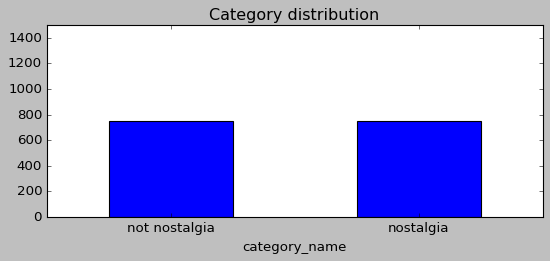

In [114]:
# Distribution in original dataset
print(data.category_name.value_counts())
plt.style.use('classic')
data.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 1500],        
                                    rot = 0, fontsize = 12, figsize = (8,3))

category_name
not nostalgia    512
nostalgia        488
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

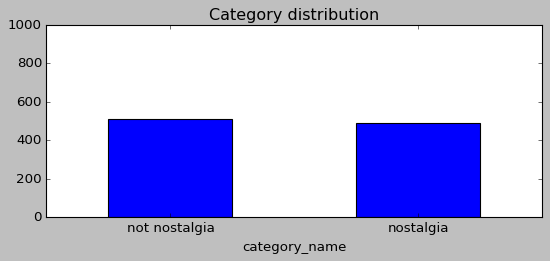

In [116]:
print(data_sample.category_name.value_counts())
plt.style.use('classic')
# plot barchart for X_sample
data_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 1000], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

category_name
not nostalgia    750
nostalgia        750
Name: count, dtype: int64


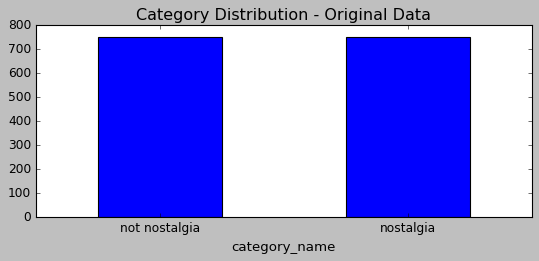

In [125]:
#Automate the maximum value for y
upper_bound = max(data['category_name'].value_counts().max(), data_sample['category_name'].value_counts().max()) + 50
print(data.category_name.value_counts())
plt.style.use('classic')
data['category_name'].value_counts().plot(
    kind='bar',
    title='Category Distribution - Original Data',
    ylim=[0, upper_bound],
    rot=0, fontsize=11, figsize=(8, 3)
)
plt.show()

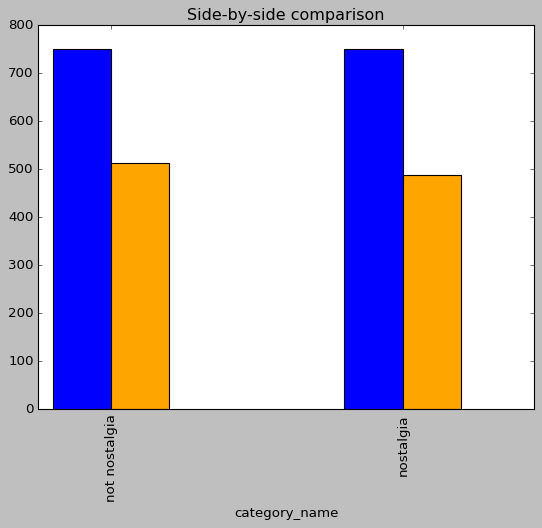

In [128]:
#Side-by-side comparison of original and sampled data
original_counts = data['category_name'].value_counts()
sample_counts = data_sample['category_name'].value_counts()

# Plot original and sampled data side-by-side
ax = original_counts.plot(
    kind='bar',
    width=0.2,
    position=1,
    color='blue',
    title='Side-by-side comparison',
    ylim=[0, upper_bound],
    rot=-90, fontsize=12
)

sample_counts.plot(
    kind='bar',
    width=0.2,
    position=0,
    color='orange',
    ax=ax
)

plt.show()

In [130]:
#Feature Creation
import nltk
nltk.download('punkt') 

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/charlotteli/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [131]:
data['unigrams'] = data['comment'].apply(lambda x: dmh.tokenize_text(x))

In [132]:
data[0:4]["unigrams"]

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object

In [133]:
data[0:4]

,sentiment,comment,label,category_name,unigrams
0,not nostalgia,He was a singer with a golden voice that I lov...,0,not nostalgia,"[He, was, a, singer, with, a, golden, voice, t..."
1,nostalgia,The mist beautiful voice ever I listened to hi...,1,nostalgia,"[The, mist, beautiful, voice, ever, I, listene..."
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1,nostalgia,"[I, have, most, of, Mr., Reeves, songs, ., Alw..."
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0,not nostalgia,"[30, day, leave, from, 1st, tour, in, Viet, Na..."


In [134]:
list(data[0:1]['unigrams'])

[['He',
  'was',
  'a',
  'singer',
  'with',
  'a',
  'golden',
  'voice',
  'that',
  'I',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  '.',
  'I',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  '.',
  'Although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  ',',
  'but',
  ',',
  'I',
  'can',
  'vouch',
  'for',
  'Jim',
  'Reeves',
  'all',
  'the',
  'time',
  '.',
  'You',
  'feel',
  'relaxed',
  ',',
  'emotional',
  'and',
  'loving',
  '.',
  'Thank',
  'you',
  'Lord',
  'for',
  'his',
  'life',
  '.']]

In [135]:
#Feature subset selection
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(data['comment'])
print(X_counts[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 45 stored elements and shape (1, 3730)>
  Coords	Values
  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


In [137]:
count_vect.get_feature_names_out()[56]

'1990'

In [138]:
#create analyzers
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza that is a crime to Italian")

# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

['am',
 'craving',
 'for',
 'hawaiian',
 'pizza',
 'that',
 'is',
 'crime',
 'to',
 'italian']

In [139]:
analyze = count_vect.build_analyzer()
analyze(data['comment'][0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

In [140]:
#check the shape of matrix
X_counts.shape

(1500, 3730)

In [141]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [143]:
# convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [144]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [145]:
#Heat map
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [147]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(data.index)[0:20]]

In [148]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

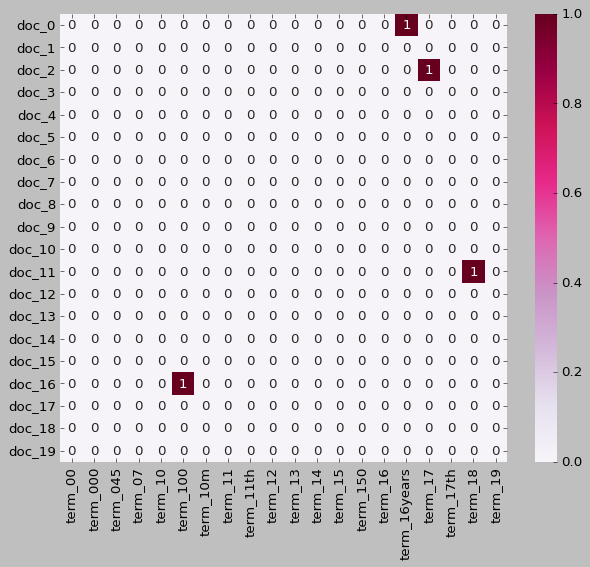

In [149]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [150]:
#Calculate sparsity
frequency_of_1 = (X_counts == 1).sum()
total_elements = X_counts.size
frequency_ratio = frequency_of_1 / total_elements
frequency_ratio

0.8875559820857326

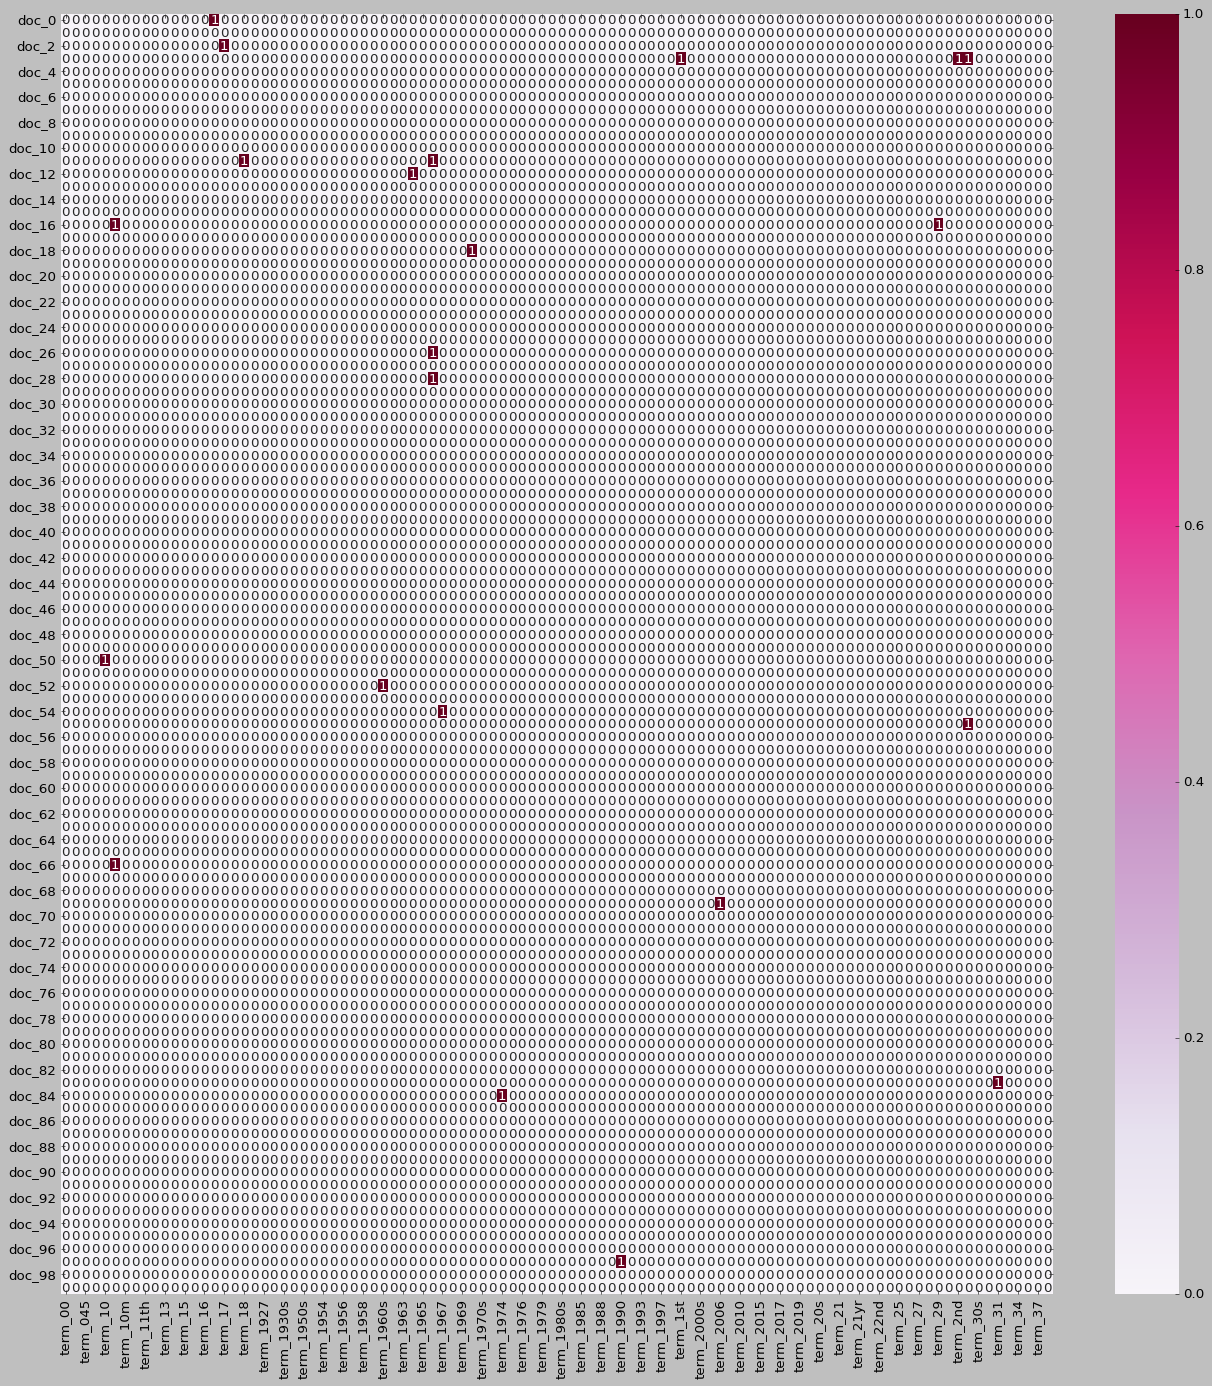

In [152]:
#Modify to plot a 100x100 subset
import seaborn as sns

plot_z = X_counts[0:100, 0:100].toarray()
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:100]]
plot_y = ["doc_"+ str(i) for i in list(data.index)[0:100]]

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(20, 20))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [157]:
#Attribute Transformation / Aggregation
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [162]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [172]:
term_frequencies[0]

1

/var/folders/d4/0xlglqj52wq9t0wxldpv_p180000gn/T/ipykernel_74190/3480579971.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


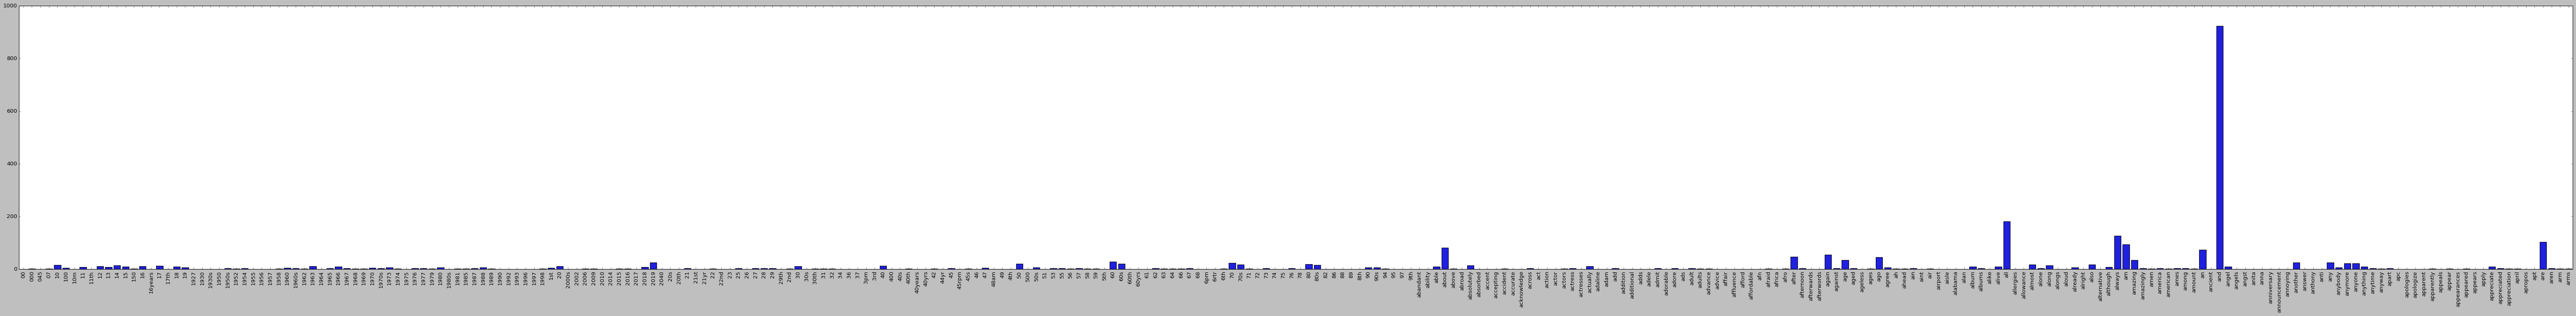

In [173]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

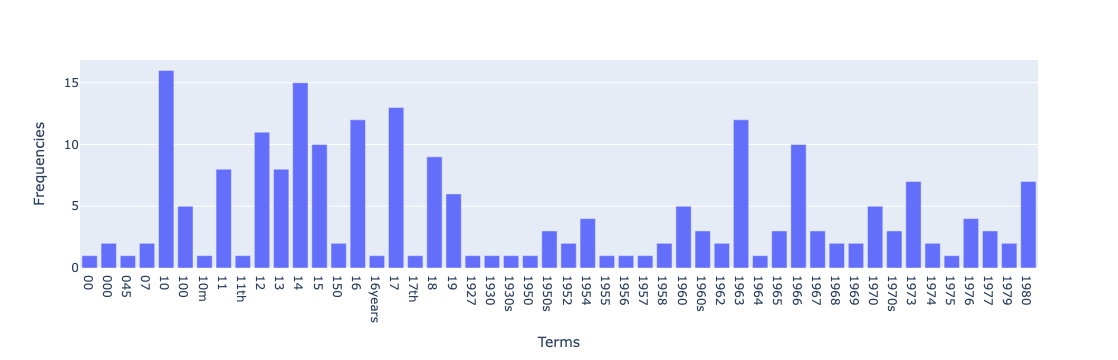

In [179]:
# Make it interactive
import plotly.express as px

fig = px.bar(
    x=count_vect.get_feature_names_out()[:50], 
    y=term_frequencies[:50], 
    labels={"x": "Terms", "y": "Frequencies"}
)

fig

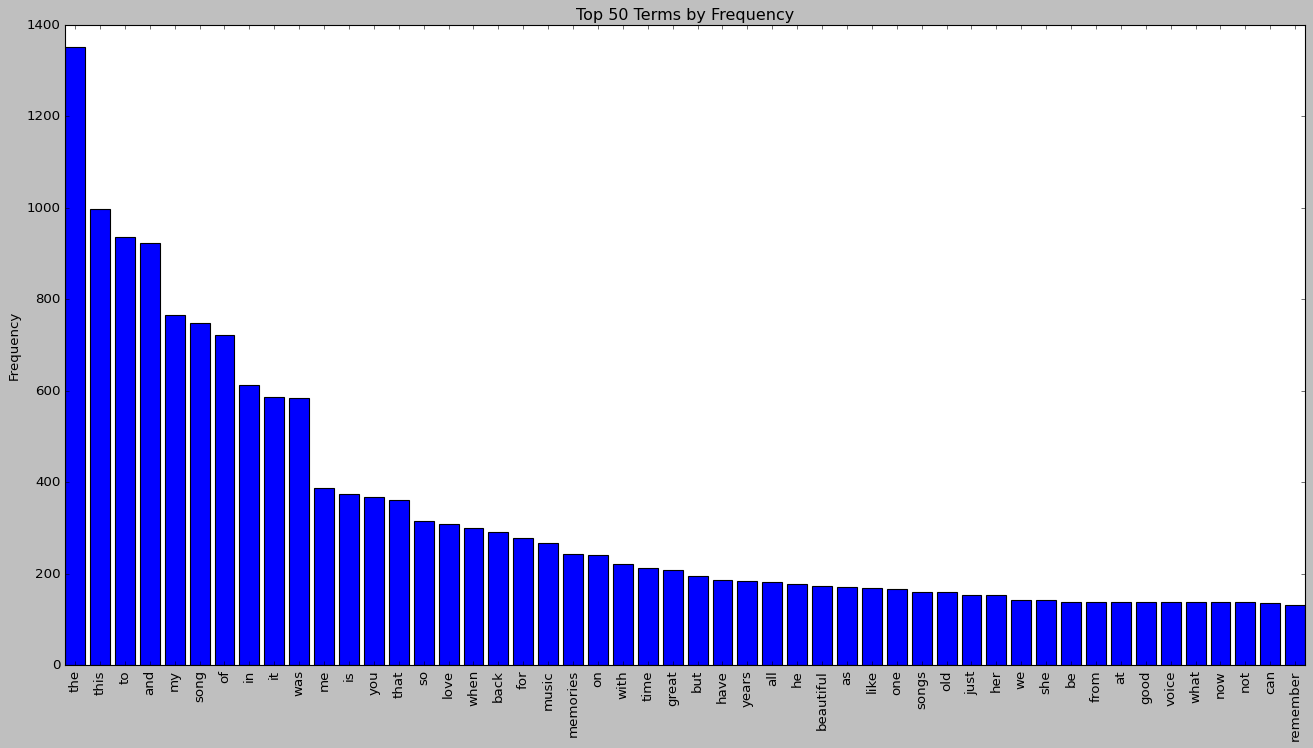

In [180]:
#Visualization for top 50 terms
import numpy as np
import matplotlib.pyplot as plt

# Sort by frequency, get top 50
top_50_indices = np.argsort(term_frequencies)[-50:][::-1]
top_50_terms = [count_vect.get_feature_names_out()[i] for i in top_50_indices]
top_50_frequencies = term_frequencies[top_50_indices]

# Plot the top 50 terms
plt.figure(figsize=(20, 10))
plt.bar(top_50_terms, top_50_frequencies)
plt.xticks(rotation=90)
plt.title('Top 50 Terms by Frequency')
plt.ylabel('Frequency')
plt.show()

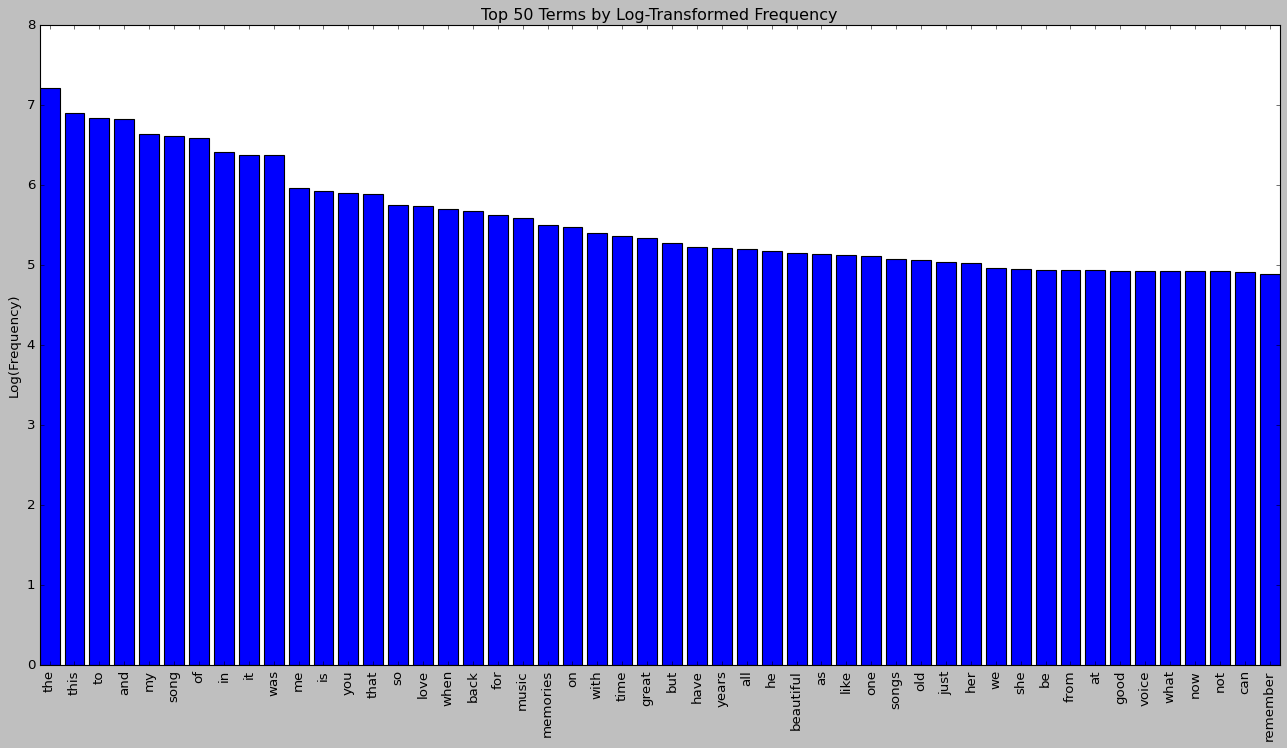

In [181]:
# Apply log transformation
import math

term_frequencies_log = [math.log(freq) if freq > 0 else 0 for freq in top_50_frequencies]

# Plot the log-transformed frequencies
plt.figure(figsize=(20, 10))
plt.bar(top_50_terms, term_frequencies_log)
plt.xticks(rotation=90)
plt.title('Top 50 Terms by Log-Transformed Frequency')
plt.ylabel('Log(Frequency)')
plt.show()

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/pyplot.py'>

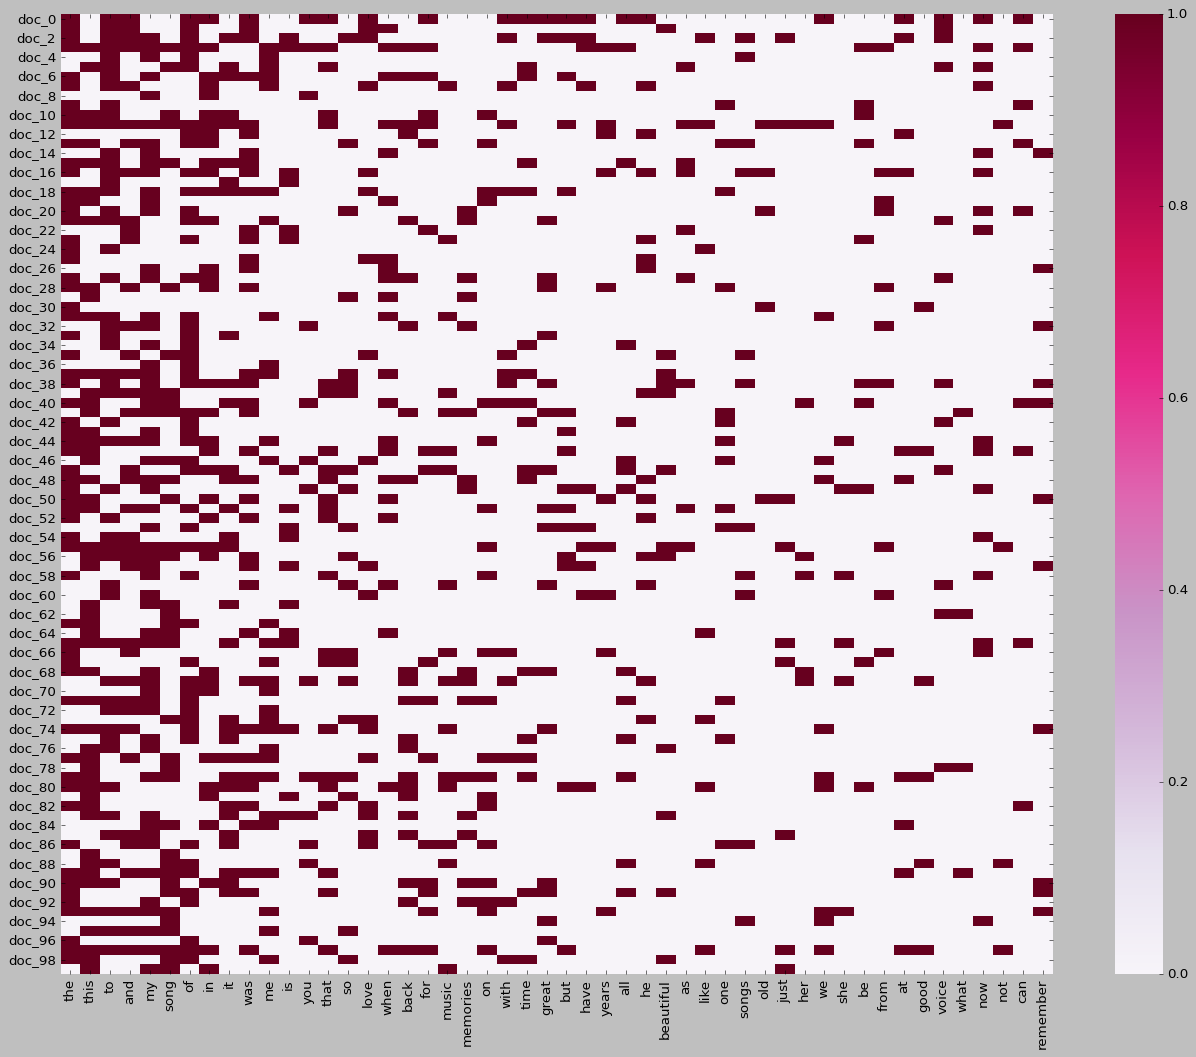

In [184]:
#Try to make a heat map of the first 100 terms
import seaborn as sns

plot_z = X_counts[0:100, top_50_indices[:100]].toarray()
plot_x = [term for term in top_50_terms[:100]]
plot_y = ["doc_" + str(i) for i in range(100)]

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
plt.subplots(figsize=(20, 15))
sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=False)
plt

In [185]:
###Finding frequent patterns###
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [186]:
#Create separate DataFrames for each category
categories = data['category_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    category_dfs[category] = data[data['category_name'] == category].copy()

def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize CountVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # Transform text data into word counts
    
    # Get the unique words from the vectorizer and create the DataFrame
    words = count_vect.get_feature_names_out()
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {category: create_term_document_df(df) for category, df in category_dfs.items()}

In [205]:
# Display the filtered DataFrame for one of the categories
category_number=1
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category nostalgia:


,07,10,11,11th,12,13,14,15,16,17,...,young,younger,youngster,your,yours,youth,youthful,youtube,yrs,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


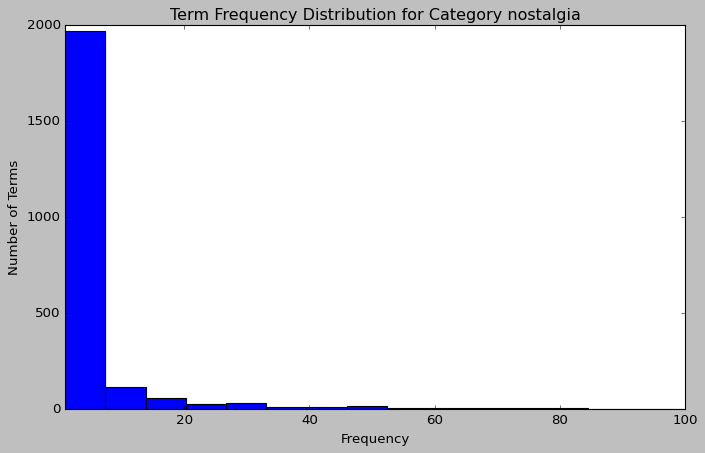

In [211]:
category_number = 1  
category_name = categories[category_number]
word_counts = filt_term_document_dfs[category_name].sum(axis=0).to_numpy()

plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=100, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {category_name}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 100)
plt.show()


In [218]:
#Identify top 5% most frequent terms
category_number = 0 
category_name = categories[category_number]
word_counts = filt_term_document_dfs[category_name].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['the', 'this', 'and', 'to', 'of', 'song', 'it', 'is', 'in', 'you', 'that', 'my', 'love', 'music', 'was', 'for', 'so', 'have', 'one', 'like', 'but', 'he', 'with', 'great', 'all', 'what', 'on', 'not', 'be', 'voice', 'can', 'me', 'just', 'beautiful', 'as', 'songs', 'time', 'her', 'she', 'will', 'they', 'when', 'from', 'his', 'at', 'are', 'always', 'good', 'no', 'never', 'know', 'now', 'about', 'much', 'who', 'really', 'more', 'we', 'if', 'best', 'by', 'ever', 'thank', 'would', 'think', 'still', 'only', 'don', 'how', 'very', 'has', 'there', 'am', 'out', 'could', 'him', 'these', 'old', 'an', 'up', 'do', 'listen', 'hear', 'singer', 'had', 'many', 'here', 'such', 'too', 'today', 'version', 'been', 'world', 'heard', 'most', 'your', 'get', 'people', 'some', 'video', 'man', 'sing', 'listening', 'real', 'than', 'were', 'years', 'nice', 'singing', 'heart', 'their', 'better', 'life', 'day', 'its', 'way', 'did', 'god', 'come', '

In [219]:
filt_term_document_dfs[categories[category_number]].loc[:,'the'].sum(axis=0)

708

In [220]:
#Identify top 5% most frequent terms
category_number = 1 
category_name = categories[category_number]
word_counts = filt_term_document_dfs[category_name].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: nostalgia
Number of terms in top 5%: 114
Filtered terms: ['the', 'my', 'this', 'to', 'and', 'song', 'was', 'of', 'in', 'it', 'me', 'back', 'memories', 'when', 'so', 'years', 'that', 'on', 'love', 'for', 'time', 'you', 'remember', 'old', 'with', 'is', 'music', 'great', 'brings', 'we', 'beautiful', 'as', 'all', 'but', 'now', 'days', 'at', 'miss', 'good', 'songs', 'childhood', 'reminds', 'her', 'from', 'still', 'he', 'just', 'always', 'have', 'she', 'first', 'dad', 'many', 'had', 'much', 'listening', 'his', 'like', 'loved', 'up', 'used', 'school', 'were', 'very', 'am', 'one', 'those', 'voice', 'every', 'be', 'him', 'never', 'heard', 'times', 'these', 'can', 'listen', 'not', 'young', 'what', 'are', 'best', 'they', 'played', 'hear', 'thank', 'sing', 'out', 'how', 'life', 'happy', 'thanks', 'then', 'radio', 'again', 'ago', 'really', 'mum', 'who', 'an', 'day', 'play', 'mom', 'there', 'some', 'our', 'after', 'came', 'passed', 'makes', 'wonderful', 'singing', 'little', 'takes']


In [221]:
filt_term_document_dfs[categories[category_number]].loc[:,'the'].sum(axis=0)

643

In [228]:
#Identify bottom 1%
category_number=0 
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in bottom 1%: 26
Filtered terms: ['00', 'montgomery', 'money', 'monday', 'moments', 'mocking', 'mock', 'mitch', 'misunderstood', 'minute', 'minds', 'miller', 'monumental', 'millennium', 'miles', 'microphone', 'miami', 'meta', 'mess', 'merle', 'mendes', 'mended', 'melting', 'melt', 'melodica', 'milestone']


In [230]:
category_number=1 
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: nostalgia
Number of terms in bottom 1%: 22
Filtered terms: ['yup', 'gospel', 'rose', 'round', 'rousing', 'goodness', 'routine', 'row', 'ronnie', 'rpg', 'ruined', 'rules', 'running', 'sadder', 'saddest', 'glimpses', 'safer', 'rubbish', 'grabbed', 'grace', 'romanticism', 'rightly']


In [234]:
#Filter top 5% and bottom 1%
category_number=0 

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]



For category not nostalgia we filter the following words:
Bottom 1.0% words: 
00               1
montgomery       1
money            1
monday           1
moments          1
mocking          1
mock             1
mitch            1
misunderstood    1
minute           1
minds            1
miller           1
monumental       1
millennium       1
miles            1
microphone       1
miami            1
meta             1
mess             1
merle            1
mendes           1
mended           1
melting          1
melt             1
melodica         1
milestone        1
dtype: int64
Top 5.0% words: 
first       23
classic     23
amazing     24
wish        24
make        25
          ... 
of         361
to         394
and        451
this       453
the        708
Length: 130, dtype: int64

For category nostalgia we filter the following words:
Bottom 1.0% words: 
yup            1
gospel         1
rose           1
round          1
rousing        1
goodness       1
routine        1
row         

,000,045,10,100,10m,11,12,14,15,150,...,younger,youngest,youngsters,yourself,youth,youtube,yrs,yuo,zealand,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [240]:
#using PAMI library
from PAMI.extras.DF2DB import DenseFormatDF as db

for category in term_document_dfs:
    # Ensure no special characters cause file naming issues
    category_safe = category.replace('.', '_')
    obj = db.DenseFormatDF(term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)


Statistics for Category: not nostalgia
Database size (total no of transactions) : 746
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.402144772117962
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 5.950348241365226
Variance in Transaction Sizes : 35.4541698904223
Sparsity : 0.9965649449010148

Statistics for Category: nostalgia
Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.213372063492091
Variance in Transaction Sizes : 52.10372252435774
Sparsity : 0.9959733855996001


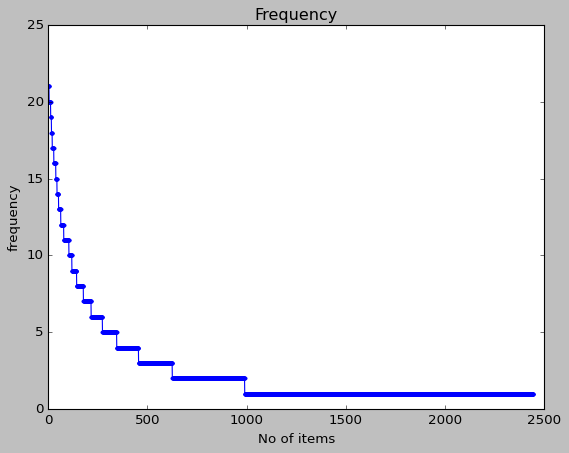

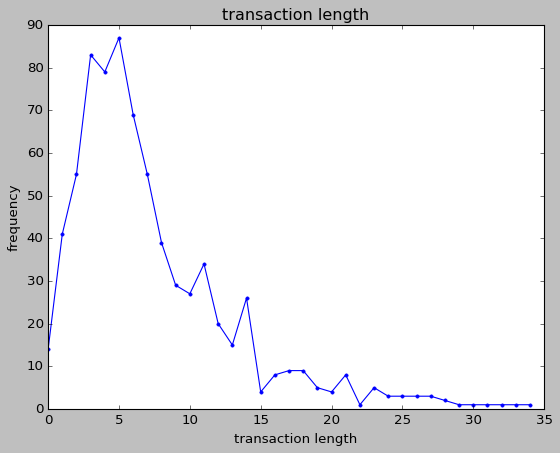

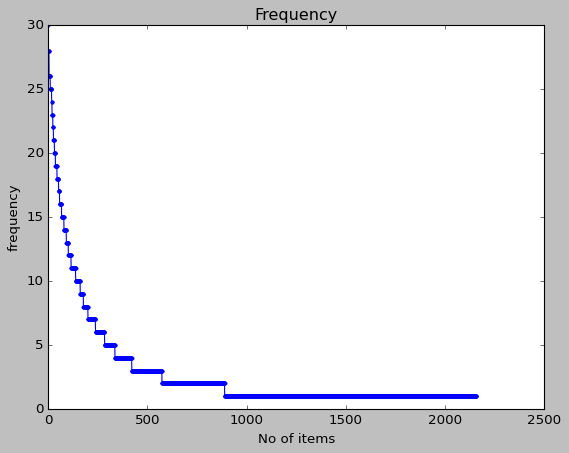

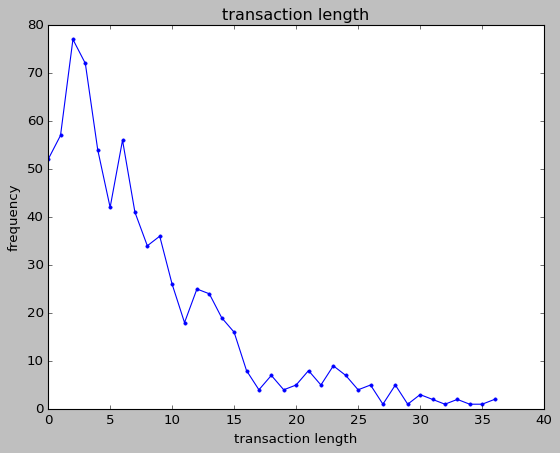

In [241]:
#Database statistics and visualization
from PAMI.extras.dbStats import TransactionalDatabase as tds

for category in categories:
    file_name = f'td_freq_db_{category.replace(".", "_")}.csv'
    obj = tds.TransactionalDatabase(file_name)
    print(f"\nStatistics for Category: {category}")
    obj.run()         
    obj.printStats()  
    obj.plotGraphs() 

In [242]:
# Frequent pattern mining with FPGrowth
from PAMI.frequentPattern.basic import FPGrowth as alg

minSup = 9
frequent_pattern_dfs = {}

for category in categories:
    file_name = f'td_freq_db_{category.replace(".", "_")}.csv'
    obj = alg.FPGrowth(iFile=file_name, minSup=minSup)
    obj.mine()
    
    # Store patterns and runtime in dictionary for each category
    frequent_pattern_dfs[category] = obj.getPatternsAsDataFrame()
    print(f"\nFrequent patterns for category '{category}' generated successfully.")
    print(f"Total No of patterns for {category}: {len(frequent_pattern_dfs[category])}")
    print(f"Runtime for {category}: {obj.getRuntime()}\n")


Frequent patterns were generated successfully using frequentPatternGrowth algorithm

Frequent patterns for category 'not nostalgia' generated successfully.
Total No of patterns for not nostalgia: 144
Runtime for not nostalgia: 0.017762184143066406

Frequent patterns were generated successfully using frequentPatternGrowth algorithm

Frequent patterns for category 'nostalgia' generated successfully.
Total No of patterns for nostalgia: 180
Runtime for nostalgia: 0.01857280731201172



In [246]:
# Save and display patterns
from PAMI.frequentPattern.basic import FPGrowth as alg

minSup = 9
frequent_patterns_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    file_name = f'td_freq_db_{category.replace(".", "_")}.csv'
    obj = alg.FPGrowth(iFile=file_name, minSup=minSup)
    obj.mine()
    
    pattern_file = f'freq_patterns_{category.replace(".", "_")}_minSup{minSup}.txt'
    obj.save(pattern_file)
    print(f"Patterns for '{category}' saved in {pattern_file}.")
    
    frequent_patterns_dfs[category] = obj.getPatternsAsDataFrame()
    print(frequent_patterns_dfs[category])

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Patterns for 'not nostalgia' saved in freq_patterns_not nostalgia_minSup9.txt.
      Patterns  Support
0    favorites        9
1      special        9
2         soul        9
3         mind        9
4           60        9
..         ...      ...
139      elvis       21
140      every       21
141      loved       21
142       them       21
143     lyrics       21

[144 rows x 2 columns]
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Patterns for 'nostalgia' saved in freq_patterns_nostalgia_minSup9.txt.
     Patterns  Support
0        find        9
1        down        9
2         few        9
3         its        9
4        sure        9
..        ...      ...
175      ever       28
176     would       28
177      will       28
178        go       28
179  favorite       30

[180 rows x 2 columns]


In [248]:
#Focusing on unique patterns
import pandas as pd

# Collect dataframes for each category by looping through `frequent_pattern_dfs`
dfs = list(frequent_pattern_dfs.values())

# Identify patterns that appear in more than one category
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}

# Calculate the total number of patterns across all categories and discarded patterns
total_patterns_count = sum(len(df) for df in dfs)
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# Filter the patterns for each category to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Combine filtered dataframes into a final dataframe and sort by support
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True).sort_values(by='Support', ascending=False)

# Display the final filtered pattern dataframe and discarded patterns count
print(final_pattern_df)
print(f"Number of patterns discarded: {discarded_patterns_count}")


      Patterns  Support
219       will       28
218      would       28
217       ever       28
216       wish       26
215         or       26
..         ...      ...
96       along        9
1      special        9
95    together        9
94        left        9
0    favorites        9

[220 rows x 2 columns]
Number of patterns discarded: 104


In [249]:
#Converting the patterns into binary data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'comment' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(data['comment'])  # 'data' holds the Hugging Face dataset
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
data['tokenized_comment'] = data['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=data.index, columns=final_pattern_df['Patterns'])

# Check if each pattern's words are in each tokenized comment
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = data['tokenized_comment'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert term-document matrix to DataFrame for merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=data.index)

# Concatenate the original TDM and the pattern matrix to create the augmented DataFrame
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,045,07,10,100,10m,11,11th,12,...,karen,place,records,until,tv,along,special,together,left,favorites
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [261]:
#Implement the FAE Top-K and MaxFPGrowth algorithms for Nostalgia
from PAMI.frequentPattern.topk.FAE import FAE
from PAMI.frequentPattern.maximal.MaxFPGrowth import MaxFPGrowth


k_values = [50, 100, 200]  
min_supports = [2, 5, 8]

results_top_k = {}
for k in k_values:
    topk = FAE(iFile='td_freq_db_Nostalgia.csv', k=k) 
    topk.mine()
    results_top_k[k] = {"patterns": topk.getPatternsAsDataFrame(), "runtime": topk.getRuntime()}


results_max_fp = {}
for min_sup in min_supports:
    max_fp = MaxFPGrowth(iFile='td_freq_db_Nostalgia.csv', minSup=min_sup)
    max_fp.mine()
    results_max_fp[min_sup] = {"patterns": max_fp.getPatternsAsDataFrame(), "runtime": max_fp.getRuntime()}


for k, result in results_top_k.items():
    print(f'Top-K | k={k} | Patterns: {len(result["patterns"])} | Runtime: {result["runtime"]}')

for min_sup, result in results_max_fp.items():
    print(f'MaxFPGrowth | minSup={min_sup} | Patterns: {len(result["patterns"])} | Runtime: {result["runtime"]}')


 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Top-K | k=50 | Patterns: 50 | Runtime: 0.07351565361022949
Top-K | k=100 | Patterns: 100 | Runtime: 0.012772083282470703
Top-K | k=200 | Patterns: 200 | Runtime: 0.024493932723999023
MaxFPGrowth | minSup=2 | Patterns: 1836 | Runtime: 0.10535812377929688
MaxFPGrowth | minSup=5 | Patterns: 319 | Runtime: 0.02173304557800293
MaxFPGrowth | minSup=8 | Patterns: 197 | Runtime: 0.013885736465454102


In [263]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

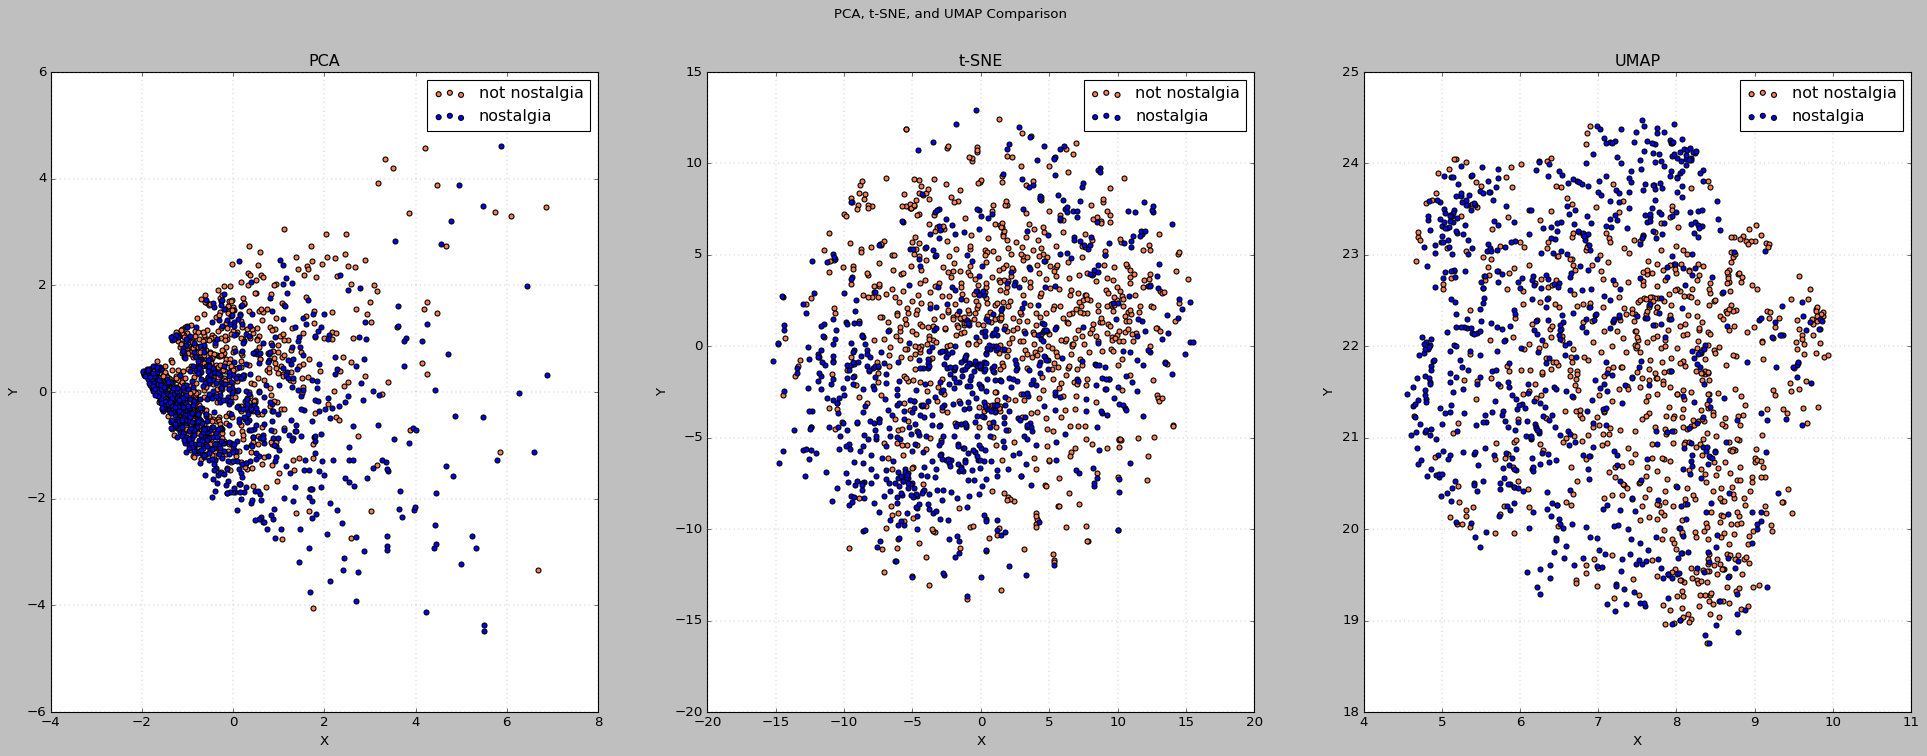

In [273]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = data['category_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[data['category_name'] == category].T[0]
        ys = X_reduced[data['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [274]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

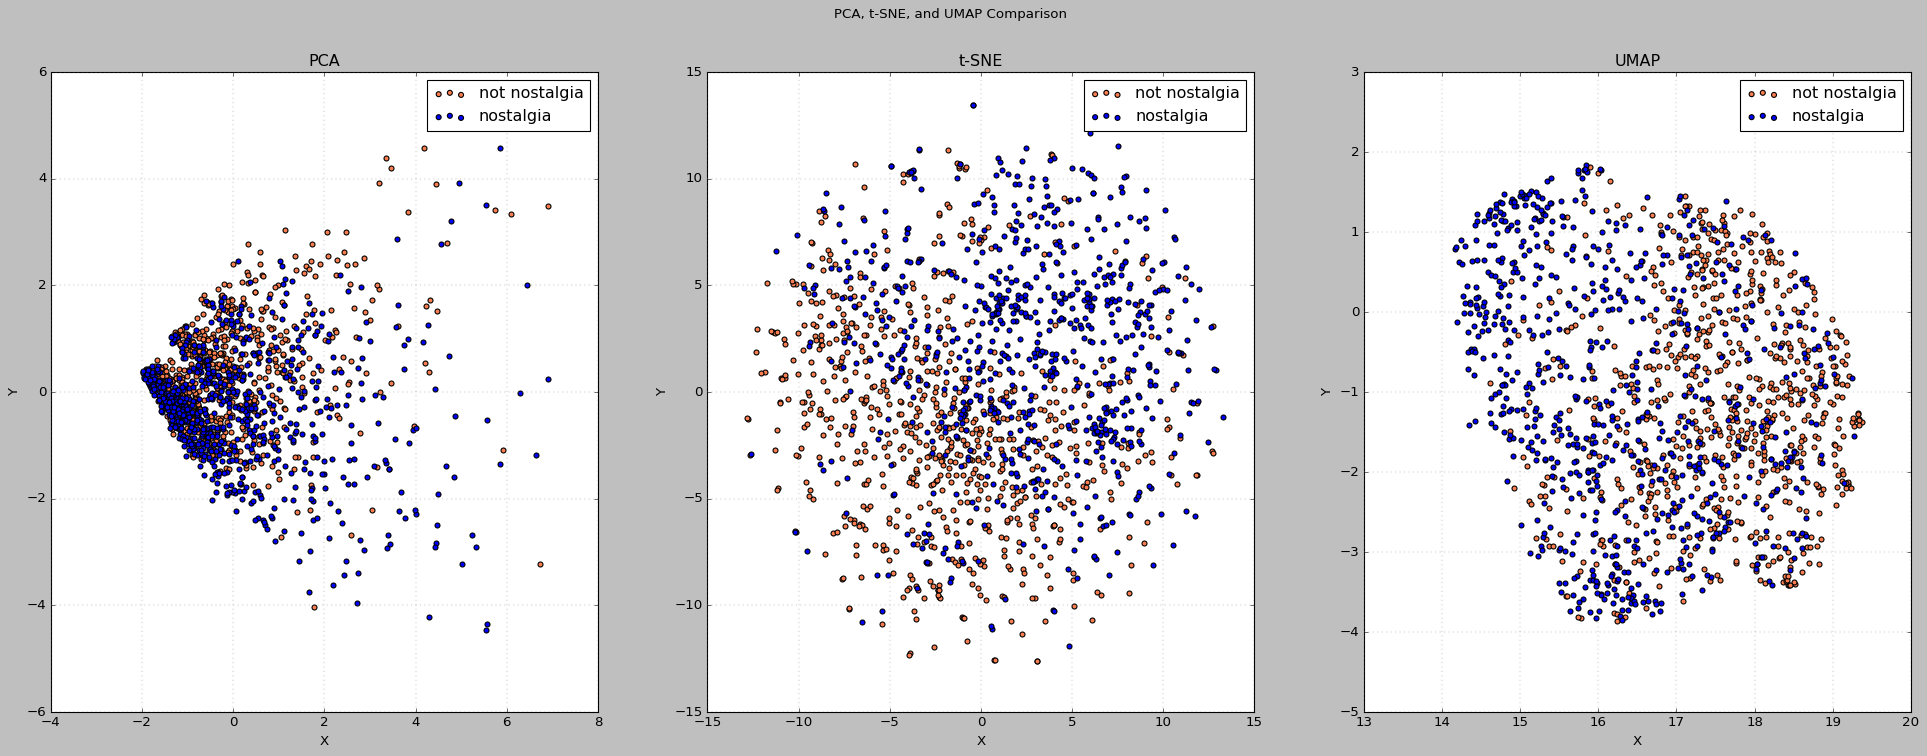

In [275]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = data['category_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[data['category_name'] == category].T[0]
        ys = X_reduced[data['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

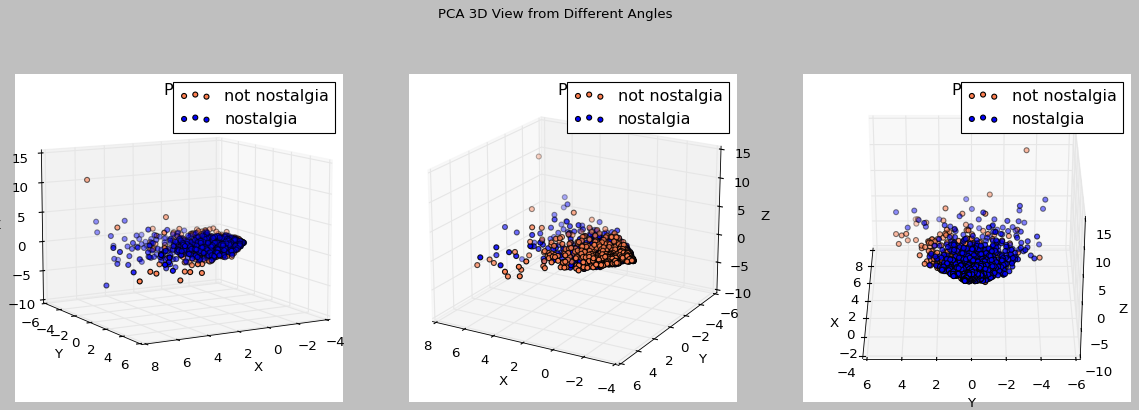

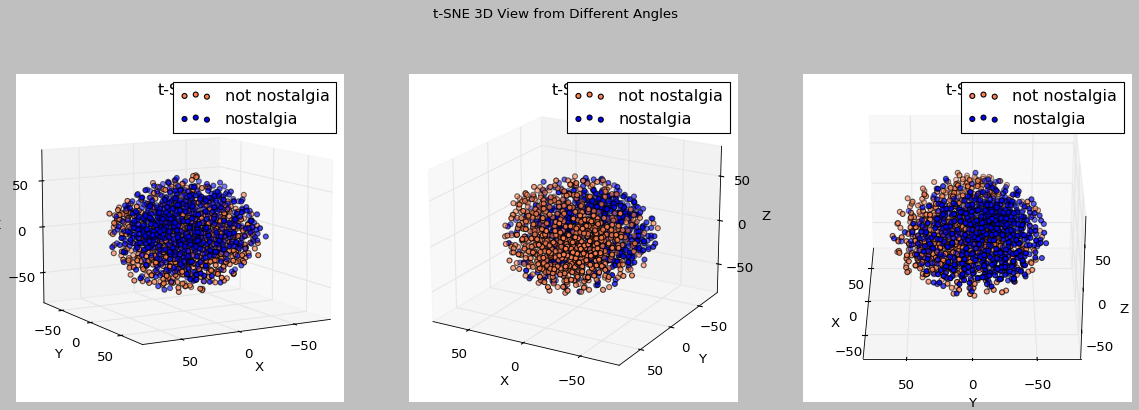

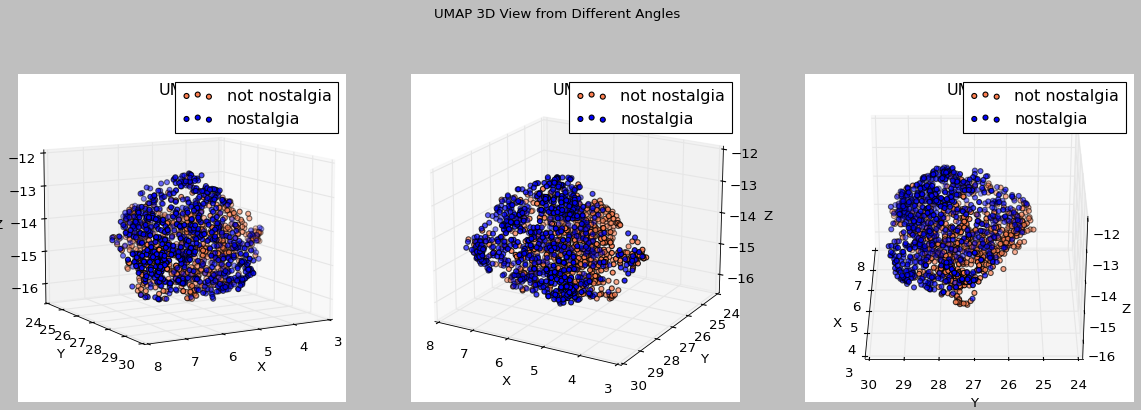

In [276]:
#reduce the dimension to 3, and plot the result use 3-D plot with 3 different angles
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

X_pca_3d = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_3d = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap_3d = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

col = ['coral', 'blue', 'black', 'orange']
categories = data['category_name'].unique() 

def plot_3d_scatter(ax, X_reduced, title, elev, azim):
    for c, category in zip(col, categories):
        xs = X_reduced[data['category_name'] == category][:, 0]
        ys = X_reduced[data['category_name'] == category][:, 1]
        zs = X_reduced[data['category_name'] == category][:, 2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.view_init(elev=elev, azim=azim)  # Set viewing angles
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')


fig = plt.figure(figsize=(18, 6))
angles = [(10, 60), (20, 120), (30, 180)]
for i, (elev, azim) in enumerate(angles, start=1):
    ax = fig.add_subplot(1, 3, i, projection='3d')
    plot_3d_scatter(ax, X_pca_3d, 'PCA', elev, azim)
fig.suptitle('PCA 3D View from Different Angles')
plt.show()


fig = plt.figure(figsize=(18, 6))
for i, (elev, azim) in enumerate(angles, start=1):
    ax = fig.add_subplot(1, 3, i, projection='3d')
    plot_3d_scatter(ax, X_tsne_3d, 't-SNE', elev, azim)
fig.suptitle('t-SNE 3D View from Different Angles')
plt.show()


fig = plt.figure(figsize=(18, 6))
for i, (elev, azim) in enumerate(angles, start=1):
    ax = fig.add_subplot(1, 3, i, projection='3d')
    plot_3d_scatter(ax, X_umap_3d, 'UMAP', elev, azim)
fig.suptitle('UMAP 3D View from Different Angles')
plt.show()


In [278]:
#Discretization and Binarization
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(data.category_name)

LabelBinarizer()

In [280]:
data['bin_category'] = mlb.transform(data['category_name']).tolist()

In [281]:
data[0:10]

,sentiment,comment,label,category_name,unigrams,tokenized_comment,bin_category
0,not nostalgia,He was a singer with a golden voice that I lov...,0,not nostalgia,"[He, was, a, singer, with, a, golden, voice, t...","{many, emotional, still, to, that, Lord, golde...",[1]
1,nostalgia,The mist beautiful voice ever I listened to hi...,1,nostalgia,"[The, mist, beautiful, voice, ever, I, listene...","{still, to, angel, him, forgotten, an, and, wh...",[0]
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1,nostalgia,"[I, have, most, of, Mr., Reeves, songs, ., Alw...","{were, no, little, most, to, had, it, --, thin...",[0]
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0,not nostalgia,"[30, day, leave, from, 1st, tour, in, Viet, Na...","{is, 30, to, tour., that, receive., hope, Lou,...",[1]
4,nostalgia,listening to his songs reminds me of my mum wh...,1,nostalgia,"[listening, to, his, songs, reminds, me, of, m...","{his, to, played, mum, everyday, me, him, who,...",[0]
5,nostalgia,"Every time I heard this song as a child, I use...",1,nostalgia,"[Every, time, I, heard, this, song, as, a, chi...","{Every, fear, many, still, to, it, that, Now, ...",[0]
6,nostalgia,"My dad loved listening to Jim Reeves, when I w...",1,nostalgia,"[My, dad, loved, listening, to, Jim, Reeves, ,...","{dad, to, it, Jim, didn't, do, back, for, when...",[0]
7,nostalgia,i HAVE ALSO LISTENED TO Jim Reeves since child...,1,nostalgia,"[i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...","{since, to, childhood, Jim, tunes, Reeves, now...",[0]
8,not nostalgia,Wherever you are you always in my heart,0,not nostalgia,"[Wherever, you, are, you, always, in, my, heart]","{are, heart, Wherever, you, in, always, my}",[1]
9,not nostalgia,Elvis will always be number one no one can com...,0,not nostalgia,"[Elvis, will, always, be, number, one, no, one...","{number, no, be, Elvis, close, one, can, to, t...",[1]


In [283]:
###Data Exploration###
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = data.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = data.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = data.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [284]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['My grandma really loved elvis ???s music .. so we played this song at her funeral .. everytime i listen to this Song there are so many memories in my head']
["My grandad listens this on a CD with me and I learned the words but sadly he passed away and we will miss and love him I lost him when I'm 11 I will always miss him:("]


In [285]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [287]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(data)f" %{"data":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(data)f" %{"data":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(data)f" %{"data":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(data)f" %{"data":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(data)f" %{"data":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(data)f" %{"data":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.124611
Cosine Similarity using count bw 1 and 3: 0.170251
Cosine Similarity using count bw 2 and 3: 0.121988
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/var/folders/d4/0xlglqj52wq9t0wxldpv_p180000gn/T/ipykernel_74190/1084518638.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/d4/0xlglqj52wq9t0wxldpv_p180000gn/T/ipykernel_74190/1084518638.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/d4/0xlglqj52wq9t0wxldpv_p180000gn/T/ipykernel_74190/1084518638.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/d4/0xlglqj52wq9t0wxldpv_p180000gn/T/ipykernel_74190/1084518638.py:17:

In [292]:
###Data Classification###
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Check column names to adjust column selection if necessary
print(data.columns)

# Create a mapping from numerical labels to category names
category_mapping = dict(data[['sentiment', 'category_name']].drop_duplicates().values)

# Convert the labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the term-document matrix for training and testing (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, data['label'], test_size=0.3, random_state=42)

Index(['sentiment', 'comment', 'label', 'category_name', 'unigrams',
       'tokenized_comment', 'bin_category'],
      dtype='object')


In [293]:
X_train

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [294]:
X_test

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
1116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
451,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
650,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [295]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8422222222222222

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.9140    0.7556    0.8273       225
not nostalgia     0.7917    0.9289    0.8548       225

     accuracy                         0.8422       450
    macro avg     0.8528    0.8422    0.8410       450
 weighted avg     0.8528    0.8422    0.8410       450



In [298]:
#Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(data[['sentiment', 'category_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, data['category_name'], test_size=0.3, random_state=42)

In [299]:
X_train

,00,000,045,07,10,100,10m,11,11th,12,...,karen,place,records,until,tv,along,special,together,left,favorites
485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [300]:
X_test

,00,000,045,07,10,100,10m,11,11th,12,...,karen,place,records,until,tv,along,special,together,left,favorites
1116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
451,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
650,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [301]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8466666666666667

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8000    0.9244    0.8577       225
not nostalgia     0.9105    0.7689    0.8337       225

     accuracy                         0.8467       450
    macro avg     0.8553    0.8467    0.8457       450
 weighted avg     0.8553    0.8467    0.8457       450



**new data visualizations**

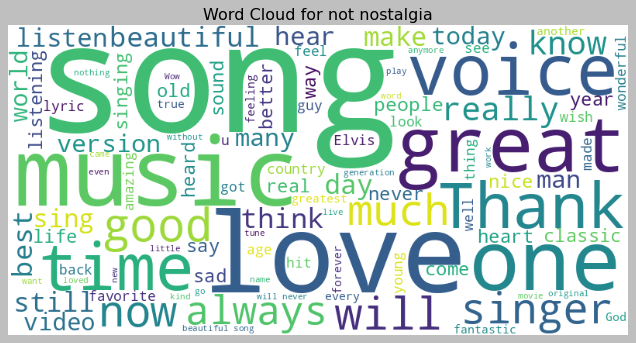

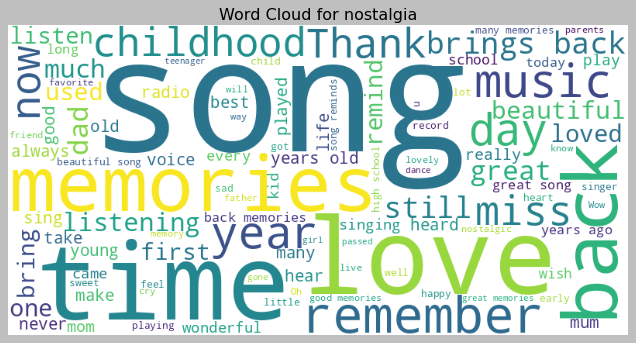

In [305]:
# Generate and display word clouds for each category
!pip install wordcloud
from wordcloud import WordCloud

for category in data['category_name'].unique():
    text = ' '.join(data[data['category_name'] == category]['comment'])
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {category}')
    plt.show()

**Generate TF-IDF features from the tokens of each text**

In [307]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  
X_tfidf = tfidf_vectorizer.fit_transform(data['comment'])  

# Convert to a DataFrame for easier handling
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [308]:
tfidf_df.iloc[:5, :10]

,00,000,045,07,10,100,10m,11,11th,12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Implement a simple Naive Bayes classifier that automatically classifies the records into their categories.**

In [310]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split data
X_train_freq, X_test_freq, y_train, y_test = train_test_split(tdm_df, data['category_name'], test_size=0.3, random_state=42)
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(tfidf_df, data['category_name'], test_size=0.3, random_state=42)

# Multinomial Naive Bayes for word frequency
mnb = MultinomialNB()
mnb.fit(X_train_freq, y_train)
y_pred_freq = mnb.predict(X_test_freq)
print("Word Frequency NB - Accuracy:", accuracy_score(y_test, y_pred_freq))
print(classification_report(y_test, y_pred_freq))

# Complement Naive Bayes for TF-IDF
cnb = ComplementNB()
cnb.fit(X_train_tfidf, y_train)
y_pred_tfidf = cnb.predict(X_test_tfidf)
print("TF-IDF NB - Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print(classification_report(y_test, y_pred_tfidf))

Word Frequency NB - Accuracy: 0.8422222222222222
               precision    recall  f1-score   support

    nostalgia       0.79      0.93      0.85       225
not nostalgia       0.91      0.76      0.83       225

     accuracy                           0.84       450
    macro avg       0.85      0.84      0.84       450
 weighted avg       0.85      0.84      0.84       450

TF-IDF NB - Accuracy: 0.8488888888888889
               precision    recall  f1-score   support

    nostalgia       0.80      0.93      0.86       225
not nostalgia       0.92      0.76      0.83       225

     accuracy                           0.85       450
    macro avg       0.86      0.85      0.85       450
 weighted avg       0.86      0.85      0.85       450



**inefficent parts of the lab**